均方误差： 29.531685225715496


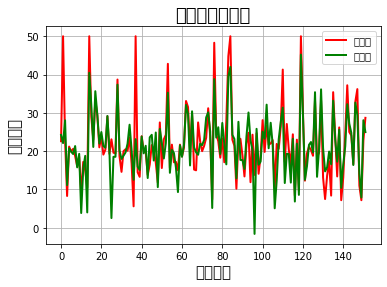

In [2]:
# data 第一列为标记值
# data 后几列为特征向量
# initialTheta 为需要求得的theta
import numpy as np
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
 
###################
## data 第一列为真值，后面所有列为特征
## initialTheta 估算的权值初值
## featureNum 特征的个数
def RLS_Fun(data, initialTheta, featureNum):
    Theta = initialTheta
    P = 10 ** 6 * np.eye(featureNum)
    lamda = 1
    for i in range(len(data)):
        featureMatrix = data[i][1:]
        featureMatrix = featureMatrix.reshape(featureMatrix.shape[0], 1)
        y_real = data[i][0]
        K = np.dot(P, featureMatrix) / (lamda + np.dot(np.dot(featureMatrix.T, P), featureMatrix))
        Theta = Theta + np.dot(K, (y_real - np.dot(featureMatrix.T, Theta)))
        P = np.dot((np.eye(featureNum) - np.dot(K, featureMatrix.T)), P)
    return Theta
 
 
if __name__ == '__main__':
    warnings.filterwarnings(action='ignore')
    dataInitial = sklearn.datasets.load_boston()
    x = np.array(dataInitial.data)
    y = np.array(dataInitial.target)
    y = y.reshape((y.shape[0], 1))
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=0)
    data = np.concatenate((y_train, x_train), axis=1)
    featureNum = np.shape(x)[1]  # 有几个特征
    initialTheta = 0.5 * np.ones((featureNum, 1))
    Theta = RLS_Fun(data, initialTheta, featureNum)
    y_pred = np.dot(x_test, Theta)
    mse = mean_squared_error(y_test, y_pred)
    print('均方误差：', mse)
    t = np.arange(len(y_pred))
    mpl.rcParams['font.sans-serif'] = ['simHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.plot(t, y_test, 'r-', lw=2, label='真实值')
    plt.plot(t, y_pred, 'g-', lw=2, label='估计值')
    plt.legend(loc='best')
    plt.title('波士顿房价预测', fontsize=18)
    plt.xlabel('样本编号', fontsize=15)
    plt.ylabel('房屋价格', fontsize=15)
    plt.grid()
    plt.show()


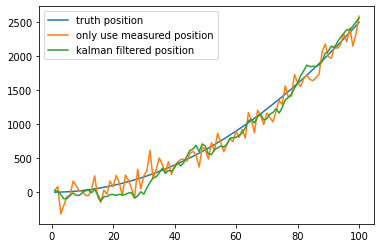

In [6]:
"""
@司南牧 
"""
import numpy as np

# 模拟数据
t = np.linspace(1,100,100)
a = 0.5
position = (a * t**2)/2

position_noise = position+np.random.normal(0,120,size=(t.shape[0]))
import matplotlib.pyplot as plt
plt.plot(t,position,label='truth position')
plt.plot(t,position_noise,label='only use measured position')


# 初试的估计导弹的位置就直接用GPS测量的位置
predicts = [position_noise[0]]
position_predict = predicts[0]

predict_var = 0
odo_var = 120**2 #这是我们自己设定的位置测量仪器的方差，越大则测量值占比越低
v_std = 50 # 测量仪器的方差
for i in range(1,t.shape[0]):
  
    dv =  (position[i]-position[i-1]) + np.random.normal(0,50) # 模拟从IMU读取出的速度
    position_predict = position_predict + dv # 利用上个时刻的位置和速度预测当前位置
    predict_var += v_std**2 # 更新预测数据的方差
    # 下面是Kalman滤波
    position_predict = position_predict*odo_var/(predict_var + odo_var)+position_noise[i]*predict_var/(predict_var + odo_var)
    predict_var = (predict_var * odo_var)/(predict_var + odo_var)**2
    predicts.append(position_predict)

    
plt.plot(t,predicts,label='kalman filtered position')

plt.legend()
plt.show()


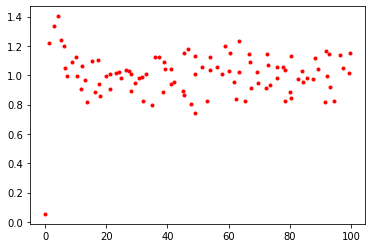

In [61]:
import numpy as np
import matplotlib.pyplot as plt
# 创建一个0-99的一维矩阵
z = [i for i in range(100)]

z_watch = np.mat(z)

#print(z_mat)
# 创建一个方差为1的高斯噪声，精确到小数点后两位
noise = np.round(np.random.normal(0, 1, 100), 2)
noise_mat = np.mat(noise)
# 将z的观测值和噪声相加
z_mat = z_watch + noise_mat
#print(z_watch)
# 定义x的初始状态
x_mat = np.mat([[0,], [0,]])
# 定义初始状态协方差矩阵
p_mat = np.mat([[1, 0], [0, 1]])
# 定义状态转移矩阵，因为每秒钟采一次样，所以delta_t = 1
f_mat = np.mat([[1, 1], [0, 1]])
#print(f_mat)
# 定义状态转移协方差矩阵，这里我们把协方差设置的很小，因为觉得状态转移矩阵准确度高
q_mat = np.mat([[0.01, 0], [0, 0.0001]])
# 定义观测矩阵
h_mat = np.mat([1, 0])
# 定义观测噪声协方差
r_mat = np.mat([0.00001])
 
for i in range(100):
    x_predict = f_mat * x_mat
    #print(x_predict)
    p_predict = f_mat * p_mat * f_mat.T + q_mat
    kalman = p_predict * h_mat.T / ( h_mat *p_predict * h_mat.T + r_mat)
    x_mat = x_predict + kalman *(z_mat[0, i] - h_mat * x_predict)
    p_mat = (np.eye(2) - kalman * h_mat) * p_predict
    
    plt.plot(x_mat[0, 0], x_mat[1, 0], 'ro', markersize = 3)
    
plt.show()


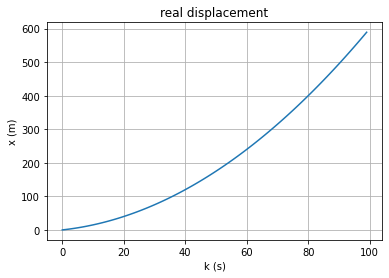

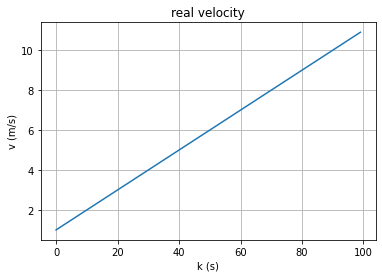

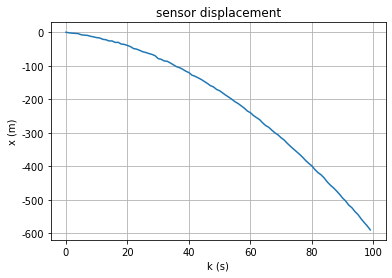

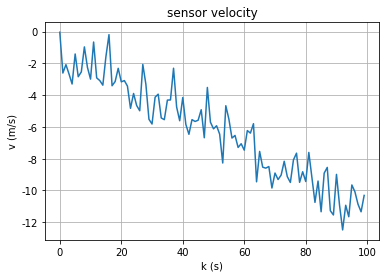

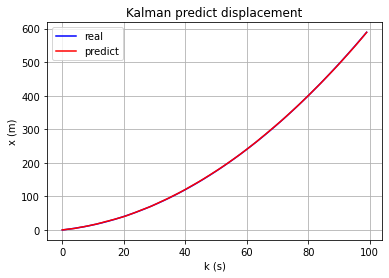

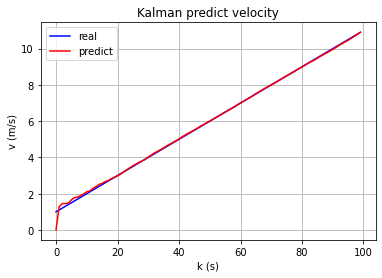

In [105]:
import numpy as np
import math
import matplotlib.pyplot as plt

if __name__=="__main__":
    ## 1.设计一个匀加速直线运动，以观测此运动
    X_real = np.mat(np.zeros((2, 100))) # 空矩阵，用于存放真实状态向量
    X_real[:, 0] = np.mat([[0.0], # 初始状态向量
                           [1.0]])
    a_real = 0.1# 真实加速度
    F = np.mat([[1.0, 1.0], # 状态转移矩阵
                [0.0, 1.0]])
    Q = np.mat([[0.0001, 0.0], # 状态转移协方差矩阵，我们假设外部干扰很小
                [0.0, 0.0001]])
    B = np.mat([[0.5], # 控制矩阵
                [1.0]])
    for i in range(99):
        X_real[:, i + 1] = F * X_real[:, i] + B * a_real # 计算真实状态向量
    X_real = np.array(X_real)
    fig = plt.figure(1)
    plt.grid()
    plt.title('real displacement')
    plt.xlabel('k (s)')
    plt.ylabel('x (m)')
    plt.plot(X_real[0, :])
    plt.show()
    fig = plt.figure(2)
    plt.grid()
    plt.title('real velocity')
    plt.xlabel('k (s)')
    plt.ylabel('v (m/s)')
    plt.plot(X_real[1, :])
    plt.show()
    X_real = np.mat(X_real)
    
    ## 2.建立传感器观测值
    z_t = np.mat(np.zeros((2, 100))) # 空矩阵，用于存放传感器观测值
    H = np.mat(np.zeros((2, 2)))
    H[0, 0], H[1, 1] = -1.0, -1.0
    noise = np.mat(np.random.randn(2,100)) # 加入位移方差为1，速度方差为1的传感器噪声
    R = np.mat([[1.001, 0.0], # 观测噪声的协方差矩阵
                [0.0, 1.001]])
    for i in range(100):
        z_t[:, i] = H * X_real[:, i] + noise[:, i]
    z_t = np.array(z_t)
    fig = plt.figure(3)
    plt.grid()
    plt.title('sensor displacement')
    plt.xlabel('k (s)')
    plt.ylabel('x (m)')
    plt.plot(z_t[0, :])
    plt.show()
    fig = plt.figure(4)
    plt.grid()
    plt.title('sensor velocity')
    plt.xlabel('k (s)')
    plt.ylabel('v (m/s)')
    plt.plot(z_t[1, :])
    plt.show()
    z_t = np.mat(z_t)
    
    
    ## 3.执行线性卡尔曼滤波
  #  Q = np.mat([[1.0, 0.0], # 状态转移协方差矩阵，我们假设外部干扰很小，
   #             [0.0, 1.0]])# 转移矩阵可信度很高
    # 建立一系列空序列用于储存结果
    X_update = np.mat(np.zeros((2, 100)))
    P_update = np.zeros((100, 2, 2))
    X_predict = np.mat(np.zeros((2, 100)))
    P_predict = np.zeros((100, 2, 2))
    P_update[0, :, :] = np.mat([[1.0, 0.0], # 状态向量协方差矩阵初值
                                [0.0, 1.0]])
    P_predict[0, :, :] = np.mat([[1.0, 0.0], # 状态向量协方差矩阵初值
                                 [0.0, 1.0]])
    for i in range(99):
        # 预测
        X_predict[:, i + 1] = F * X_update[:, i] + B * a_real
        P_p = F * np.mat(P_update[i, :, :]) * F.T + Q
        P_predict[i + 1, :, :] = P_p
        # 更新
        K = P_p * H.T * np.linalg.inv(H * P_p * H.T + R) # 卡尔曼增益
        P_u = P_p - K * H * P_p
        P_update[i + 1, :, :] = P_u
        X_update[:, i + 1] = X_predict[:, i + 1] + K * (z_t[:, i + 1] - H * X_predict[:, i + 1])
    X_update = np.array(X_update)   
    X_real = np.array(X_real) 
    fig = plt.figure(5)
    plt.grid()
    plt.title('Kalman predict displacement')
    plt.xlabel('k (s)')
    plt.ylabel('x (m)')
    plt.plot(X_real[0, :], label='real', color='b')
    plt.plot(X_update[0, :], label='predict', color='r')
    plt.legend()
    plt.show()
    fig = plt.figure(6)
    plt.grid()
    plt.title('Kalman predict velocity')
    plt.xlabel('k (s)')
    plt.ylabel('v (m/s)')
    plt.plot(X_real[1, :], label='real', color='b')
    plt.plot(X_update[1, :], label='predict', color='r')
    plt.legend()
    plt.show()
    